# Top

In [ ]:
# google colab preliminaries
from google.colab import drive
drive.mount('/content/gdrive')
drive_path = "/content/gdrive/MyDrive/Career/ML Study/kaggle_ubiquant/"

# !pip install git+https://github.com/dennischenfeng/kaggle-ubiquant.git --no-cache-dir --ignore-installed

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Sat Feb 19 02:18:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----

In [ ]:
# git clone the repo
!git clone https://github.com/dennischenfeng/kaggle-ubiquant.git
# !pip install -U pip
!pip install kaggle-ubiquant/.

import sys
sys.path.insert(0, '/content/kaggle-ubiquant')
import kaggle_ubiquant
assert kaggle_ubiquant.__file__ == "/content/kaggle-ubiquant/kaggle_ubiquant/__init__.py"

fatal: destination path 'kaggle-ubiquant' already exists and is not an empty directory.
Processing ./kaggle-ubiquant
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for kaggle-ubiquant: filename=kaggle_ubiquant-0.1.0-py3-none-any.whl size=237605 sha256=334c56c6f4101621d1138ca8b6eccaf11cd2cd3d25334d3df7126843ff38f8d3
  Stored in directory: /root/.cache/pip/wheels/0a/e6/a2/cff2a64c3baee36498dc2f9667ade1b5f300f47c7532b89d4e
Successfully built kaggle-ubiquant
  Attempting uninstall: kaggle-ubiquant
    Found 

In [ ]:
# run this cell if want to git pull any changes
%%bash
cd kaggle-ubiquant
git config --global user.email "dennisfeng2@gmail.com"
git config --global user.name "Dennis"
git stash
git pull

No local changes to save
Already up to date.


In [ ]:
%load_ext autoreload
%autoreload

from kaggle_ubiquant.dataset import generate_dataset, DatasetConfig, Dataset
from kaggle_ubiquant.model import generate_model, ModelConfig
from kaggle_ubiquant.train import training_run
import pandas as pd
import numpy as np
from typing import Iterable, Dict, Tuple, Callable, Optional
from scipy.stats import pearsonr
import wandb
import dataclasses
import optuna
import pathlib

ROOT_DIR = pathlib.Path(drive_path)

# Data

In [ ]:
%%time
# df_large = pd.read_csv(ROOT_DIR / 'data/train.csv')
df_small = pd.read_csv(ROOT_DIR / 'data/train_small.csv')

CPU times: user 20.4 s, sys: 2.17 s, total: 22.5 s
Wall time: 26 s


# Try using git clone instead of pip install
Will make code repo modifications easier to roll out

In [ ]:
# TODO: continue here
!git clone https://github.com/dennischenfeng/kaggle-ubiquant.git

In [ ]:
!pip install -U pip

In [ ]:
# !pip install -q --pre poetry
# !poetry --version

In [ ]:
%%bash
cd kaggle-ubiquant
pip install kaggle-ubiquant/.

In [ ]:
import optuna

In [ ]:
import sys
sys.path.insert(0, '/content/kaggle-ubiquant')

In [ ]:
import kaggle_ubiquant

In [ ]:
import kaggle_ubiquant
kaggle_ubiquant.__file__

'/content/kaggle-ubiquant/kaggle_ubiquant/__init__.py'

End result:

In [ ]:
!git clone https://github.com/dennischenfeng/kaggle-ubiquant.git
# !pip install -U pip
!pip install kaggle-ubiquant/.

import sys
sys.path.insert(0, '/content/kaggle-ubiquant')
import kaggle_ubiquant
assert kaggle_ubiquant.__file__ == "/content/kaggle-ubiquant/kaggle_ubiquant/__init__.py"

Next: test that a change to my repo will be picked up here in colab notebook

<span style="color:red">Added 'git clone' code to top of this notebook</span>

# Test hparamSet1 on small dataset

In [ ]:
num_train_iid = len(pd.unique(df_small.investment_id))
print(num_train_iid)

# need at least one time_id for test
start_test_time_id = max(df_small.time_id) - 1
print(start_test_time_id)

use_investment_id = False
learning_rate = 0.05
max_depth = 4
min_child_weight = 1
gamma = 0.2
colsample_bytree = 0.7
tree_method = 'gpu_hist'

300
1218


In [ ]:
dc = DatasetConfig(
    num_train_iid, 
    num_train_iid, 
    num_train_iid, 
    start_test_time_id=start_test_time_id,
    use_investment_id=use_investment_id,
)

mc = ModelConfig(model_kwargs=dict(
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_child_weight=min_child_weight,
    gamma=gamma,
    colsample_bytree=colsample_bytree,
    tree_method=tree_method,
))

In [ ]:
model_small, r = training_run(df_small, dc, mc)
print(r)

100%|██████████| 256760/256760 [00:08<00:00, 31051.26it/s]
/content/kaggle-ubiquant/kaggle_ubiquant/dataset.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_lag1'] = compute_lag1(df, lag_default_value=dc.lag_default_value)
100%|██████████| 570/570 [00:00<00:00, 33423.55it/s]


0.1169730483271633


# Train XGBoost (hparamSet1) on full dataset

In [ ]:
num_train_iid = len(pd.unique(df_large.investment_id))
print(num_train_iid)

# need at least one time_id for test
start_test_time_id = max(df_large.time_id) - 1
print(start_test_time_id)

use_investment_id = False
learning_rate = 0.05
max_depth = 4
min_child_weight = 1
gamma = 0.2
colsample_bytree = 0.7
tree_method = 'gpu_hist'

3579
1218


In [ ]:
dc = DatasetConfig(
    num_train_iid, 
    num_train_iid, 
    num_train_iid, 
    start_test_time_id=start_test_time_id,
    use_investment_id=use_investment_id,
)

mc = ModelConfig(model_kwargs=dict(
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_child_weight=min_child_weight,
    gamma=gamma,
    colsample_bytree=colsample_bytree,
    tree_method=tree_method,
))

In [ ]:
model, r = training_run(df_large, dc, mc, wandb_project=None)

100%|██████████| 3134540/3134540 [02:08<00:00, 24340.69it/s]
/content/kaggle-ubiquant/kaggle_ubiquant/dataset.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_lag1'] = compute_lag1(df, lag_default_value=dc.lag_default_value)
100%|██████████| 6870/6870 [00:00<00:00, 42298.17it/s]


Colab session crashed b/c ran out of memory

# Shrink size of dataset to fit in memory
Full dataset crashes the notebook b/c memory usage. I think its b/c GPU memory, which is only 16 GB, whereas full dataset is 17 GB. Try shrinking to 15 GB

## 15 GB

In [ ]:
all_investment_ids = pd.unique(df_large.investment_id)

In [ ]:
n_keep = int((15 / 17.27) * len(all_investment_ids))

In [ ]:
keep_iids = np.random.choice(all_investment_ids, n_keep, replace=False)


In [ ]:
df_15GB = df_large[df_large.investment_id.isin(keep_iids)]

In [ ]:
df_15GB.to_csv(f'{drive_path}/data/train_15GB.csv')

## 12 GB

In [ ]:
import gc; gc.collect()

620

In [ ]:
all_investment_ids = pd.unique(df_large.investment_id)

In [ ]:
n_keep = int((12 / 17.27) * len(all_investment_ids))

In [ ]:
keep_iids = np.random.choice(all_investment_ids, n_keep, replace=False)

In [ ]:
df_12GB = df_large[df_large.investment_id.isin(keep_iids)]

In [ ]:
df_12GB.to_csv(f'{drive_path}/train_12GB.csv')

# (2nd try) Train XGBoost (hparamSet1) on full dataset

In [ ]:
import gc; gc.collect()

65

In [ ]:
df = pd.read_csv(ROOT_DIR / 'data/train_12GB.csv')

In [ ]:
num_train_iid = len(pd.unique(df.investment_id))
print(num_train_iid)

# need at least one time_id for test
start_test_time_id = max(df.time_id) - 1
print(start_test_time_id)

use_investment_id = False
learning_rate = 0.05
max_depth = 4
min_child_weight = 1
gamma = 0.2
colsample_bytree = 0.7
tree_method = 'gpu_hist'

2486
1218


In [ ]:
dc = DatasetConfig(
    num_train_iid, 
    num_train_iid, 
    num_train_iid, 
    start_test_time_id=start_test_time_id,
    use_investment_id=use_investment_id,
)

mc = ModelConfig(model_kwargs=dict(
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_child_weight=min_child_weight,
    gamma=gamma,
    colsample_bytree=colsample_bytree,
    tree_method=tree_method,
))

In [ ]:
model, r = training_run(df, dc, mc, wandb_project=None)

100%|██████████| 2180462/2180462 [01:55<00:00, 18873.77it/s]
/content/kaggle-ubiquant/kaggle_ubiquant/dataset.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_lag1'] = compute_lag1(df, lag_default_value=dc.lag_default_value)
100%|██████████| 4797/4797 [00:00<00:00, 30977.89it/s]


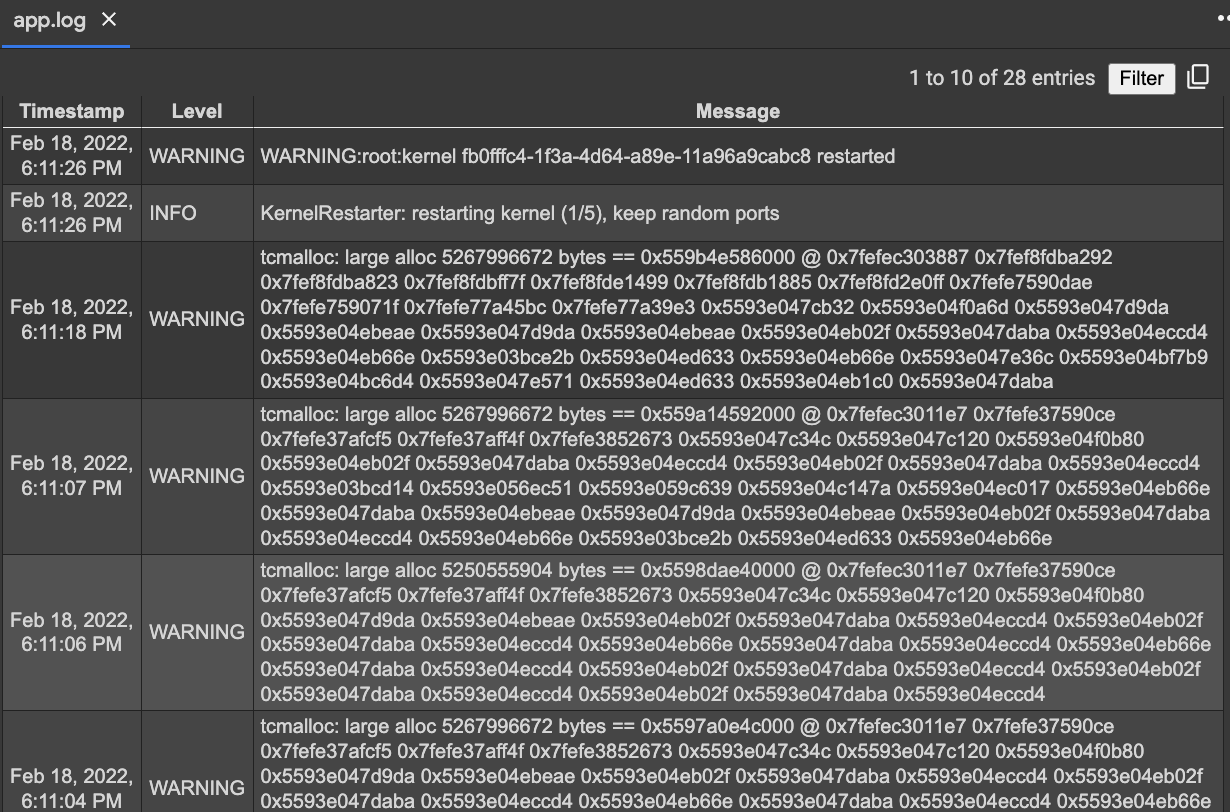

Ran out of memory again, even with just df_12GB. It's malloc'ing many chunks of 5 GB each, in the XGBoost training.

# Save and submit the model_small (trained on small dataset)
Do model_small as a first step

Save and load an sklearn model using pickle (easiest way): 
https://stackoverflow.com/questions/56107259/how-to-save-a-trained-model-by-scikit-learn

In [ ]:
import pickle

# save
with open(f'{ROOT_DIR}/models/model_XGBoostHparamSet1_trainDatasetSmall.pkl','wb') as f:
    pickle.dump(model_small, f)

In [ ]:
del model_small

In [ ]:
# load
with open(f'{ROOT_DIR}/models/model_XGBoostHparamSet1_trainDatasetSmall.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
ds = generate_dataset(dc, df_small)

100%|██████████| 256760/256760 [00:09<00:00, 28281.64it/s]
/content/kaggle-ubiquant/kaggle_ubiquant/dataset.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_lag1'] = compute_lag1(df, lag_default_value=dc.lag_default_value)
100%|██████████| 570/570 [00:00<00:00, 10543.89it/s]


In [ ]:
feature_columns = [elem for elem in list(ds.train.columns) if elem != 'target']
X_train = ds.train.loc[:, feature_columns]

In [ ]:
model.predict(X_train)

array([ 0.00556884, -0.07716048,  0.0439073 , ..., -1.0836987 ,
       -0.18177384, -0.06275029], dtype=float32)

Seems like loading the model works! <br>
Next: submit this to Kaggle